In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline

In [2]:
df = pd.read_csv('GameData.csv',header = 0)
df['Year_of_Release'] = df['Year_of_Release'].convert_objects(convert_numeric= True)
df['User_Score'] = df['User_Score'].convert_objects(convert_numeric= True)

C:\Users\lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
dfsub = df.dropna(axis=0)

In [4]:
dfsub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6928 entries, 0 to 16985
Data columns (total 16 columns):
Name               6928 non-null object
Platform           6928 non-null object
Year_of_Release    6928 non-null float64
Genre              6928 non-null object
Publisher          6928 non-null object
NA_Sales           6928 non-null float64
EU_Sales           6928 non-null float64
JP_Sales           6928 non-null float64
Other_Sales        6928 non-null float64
Global_Sales       6928 non-null float64
Critic_Score       6928 non-null float64
Critic_Count       6928 non-null float64
User_Score         6928 non-null float64
User_Count         6928 non-null float64
Developer          6928 non-null object
Rating             6928 non-null object
dtypes: float64(10), object(6)
memory usage: 920.1+ KB


In [5]:
dfsub.Rating.unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

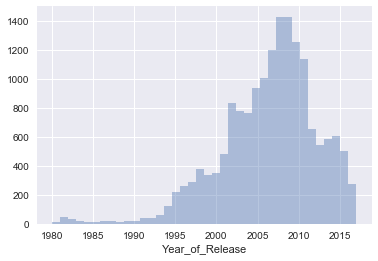

In [6]:
sns.distplot(df.Year_of_Release.dropna(), kde=False, bins = 38);

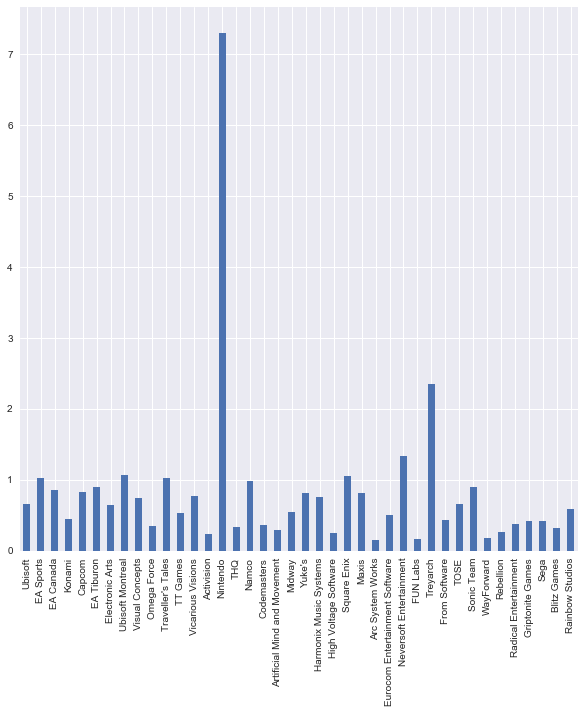

In [7]:
df.groupby(['Developer']).Global_Sales.mean()[df.Developer.value_counts().iloc[:40].index].plot(kind='bar',figsize=(10,10))

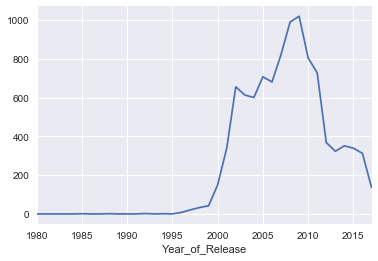

In [12]:
Sale_by_critic = df.groupby(['Year_of_Release']).Developer.count()
Sale_by_critic.plot(kind='line')

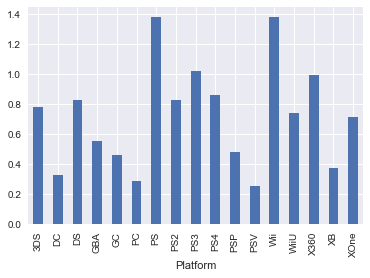

In [119]:
Sale_by_Plat = dfsub.groupby(['Platform']).Global_Sales.mean()
Sale_by_Plat.plot(kind='bar')

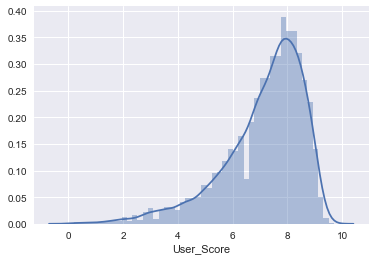

In [104]:
sns.distplot(df.User_Score.dropna());

In [77]:
yearlySales = df.groupby(['Year_of_Release']).Global_Sales.sum()
yearlyAverage = df.groupby(['Year_of_Release']).Global_Sales.mean()

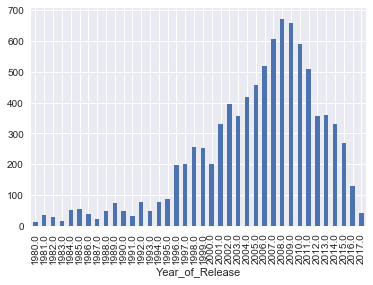

In [78]:
yearlySales.plot(kind='bar')

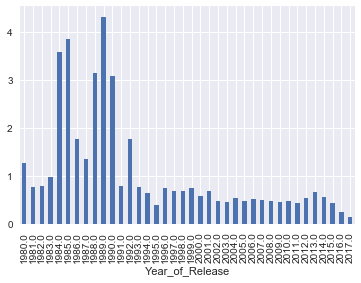

In [79]:
yearlyAverage.plot(kind='bar')

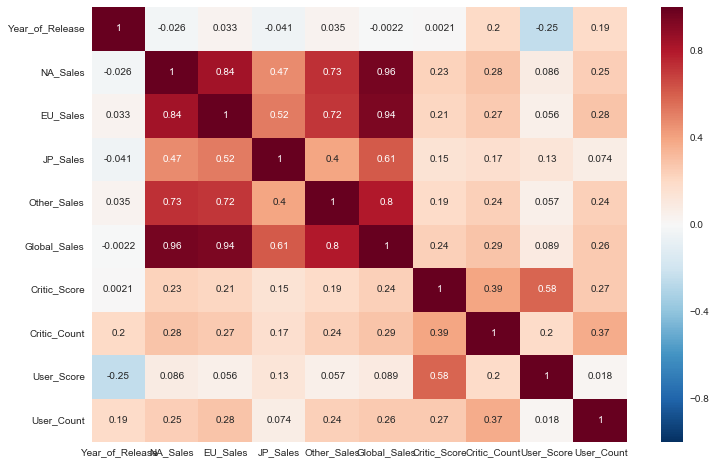

In [81]:
plt.figure(figsize=(12, 8))

df_corr = dfsub.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16991 entries, 0 to 16990
Data columns (total 16 columns):
Name               16988 non-null object
Platform           16990 non-null object
Year_of_Release    16719 non-null float64
Genre              16988 non-null object
Publisher          16933 non-null object
NA_Sales           16990 non-null float64
EU_Sales           16990 non-null float64
JP_Sales           16990 non-null float64
Other_Sales        16990 non-null float64
Global_Sales       16988 non-null float64
Critic_Score       8250 non-null float64
Critic_Count       8250 non-null float64
User_Score         7705 non-null float64
User_Count         7705 non-null float64
Developer          10232 non-null object
Rating             10080 non-null object
dtypes: float64(10), object(6)
memory usage: 2.1+ MB


In [4]:
df.groupby(['Rating']).count()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
Rating,,,,,,,,,,,,,,,
AO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
E,4008,4008,3939,4008,4006,4008,4008,4008,4008,4008,2822,2822,2389,2389,4008
E10+,1453,1453,1426,1453,1451,1453,1453,1453,1453,1453,1145,1145,1069,1069,1453
EC,8,8,8,8,8,8,8,8,8,8,0,0,1,1,8
K-A,3,3,3,3,3,3,3,3,3,3,1,1,3,3,3
M,1602,1602,1575,1602,1601,1602,1602,1602,1602,1602,1520,1520,1555,1555,1602
RP,3,3,1,3,3,3,3,3,3,3,3,3,2,2,3
T,3002,3002,2946,3002,3000,3002,3002,3002,3002,3002,2672,2672,2597,2597,3002


# Data for AO, EC K-A, RP is very sparse. So for precision we drump them from data.

In [12]:
df_sub = df[-df['Rating'].isin(['AO','EC','K-A','RP'])]

In [13]:
df_sub.groupby(['Rating']).count()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
Rating,,,,,,,,,,,,,,,
E,4008,4008,3939,4008,4006,4008,4008,4008,4008,4008,2822,2822,2389,2389,4008
E10+,1453,1453,1426,1453,1451,1453,1453,1453,1453,1453,1145,1145,1069,1069,1453
M,1602,1602,1575,1602,1601,1602,1602,1602,1602,1602,1520,1520,1555,1555,1602
T,3002,3002,2946,3002,3000,3002,3002,3002,3002,3002,2672,2672,2597,2597,3002


In [15]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16976 entries, 0 to 16990
Data columns (total 16 columns):
Name               16973 non-null object
Platform           16975 non-null object
Year_of_Release    16706 non-null float64
Genre              16973 non-null object
Publisher          16918 non-null object
NA_Sales           16975 non-null float64
EU_Sales           16975 non-null float64
JP_Sales           16975 non-null float64
Other_Sales        16975 non-null float64
Global_Sales       16973 non-null float64
Critic_Score       8245 non-null float64
Critic_Count       8245 non-null float64
User_Score         7698 non-null float64
User_Count         7698 non-null float64
Developer          10217 non-null object
Rating             10065 non-null object
dtypes: float64(10), object(6)
memory usage: 2.2+ MB


In [16]:
### convert 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating' to numeric
cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
for col in cols:
    uniques = df_sub[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        df_sub.loc[df[col] == k, col] = v

C:\Users\lin\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16976 entries, 0 to 16990
Data columns (total 16 columns):
Name               16973 non-null object
Platform           16975 non-null object
Year_of_Release    16706 non-null float64
Genre              16973 non-null object
Publisher          16918 non-null object
NA_Sales           16975 non-null float64
EU_Sales           16975 non-null float64
JP_Sales           16975 non-null float64
Other_Sales        16975 non-null float64
Global_Sales       16973 non-null float64
Critic_Score       8245 non-null float64
Critic_Count       8245 non-null float64
User_Score         7698 non-null float64
User_Count         7698 non-null float64
Developer          10217 non-null object
Rating             10065 non-null object
dtypes: float64(10), object(6)
memory usage: 2.2+ MB


In [19]:
df_sub.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,3,2006.0,1,6,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,14,0
1,Super Mario Bros.,20,1985.0,7,6,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,3,2008.0,6,6,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,14,0
3,Wii Sports Resort,3,2009.0,1,6,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,14,0
4,Pokemon Red/Pokemon Blue,21,1996.0,3,6,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
